In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7337.000000,7395.000000,7246.000000,7318.000000
mean,0.161101,60.474104,112.466602,3675.569958
std,0.367649,116.173784,183.976979,8075.826589
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,10.000000,41.912500,455.837500
50%,0.000000,33.000000,74.400000,1540.125000
75%,0.000000,61.000000,95.000000,4271.875000
max,1.000000,720.000000,1149.500000,86701.000000


In [8]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,450,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1516.50,Yes
5,9305-CDSKC,Female,0.0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0.0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0.0,No,No,100,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0.0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0.0,No,Yes,620,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [10]:
df.shape

(7395, 21)

In [12]:
duplicates = df[df['customerID'].duplicated(keep=False)]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 704


# Data Cleaning/Processing

In [17]:
# 1. Handling mismatched string formats 

# To ensure that values are consistent across our dataset we will update the columns with inconsistent values

# Example - As, we can see in our dataset columns like "MultipleLines where the values like "No" and "No phone service" mean
# the same thing, we will update in this column such that it will only show "Yes" or "No" 

df.replace("No phone service", "No", inplace=True)

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,450,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1516.50,Yes
5,9305-CDSKC,Female,0.0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0.0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0.0,No,No,100,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0.0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0.0,No,Yes,620,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [19]:
# 2. Now, we check if we have any duplicate rows in our dataset

#To check for duplicates, we will verify using the customerID, as it will be unique for each customer

duplicates = df[df['customerID'].duplicated(keep=False)]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 704


In [21]:
#As, we have 704 duplicate rows in our dataset, we will remove them

df.drop_duplicates(inplace=True)

duplicates = df[df['customerID'].duplicated(keep=False)]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [23]:
#As, we can see the duplicate columns have been removed as part of our cleaning process

In [25]:
# 3. Handle missing entries

# We will check for the missing value values in our dataset

df.isnull().sum()

customerID            0
gender                0
SeniorCitizen        56
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService      56
OnlineSecurity       49
OnlineBackup         70
DeviceProtection      0
TechSupport           0
StreamingTV         211
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      140
TotalCharges         74
Churn                 0
dtype: int64

In [27]:
#Now we will check for the % of unique rows that contains the missing values

null_rows = df[df.isnull().any(axis=1)]
unique_null_rows = null_rows.drop_duplicates().shape[0]

print((unique_null_rows/len(df))*100)

9.058639784182878


In [29]:
#As the number of null rows is high i.e. it is greater than 5%, we will proceed with updating the null values
# with their respective mean, mode and median

# a) We will replace the column with integer datatype with their mean values

df_number = df.select_dtypes(include=[np.number])

for column in df_number.columns:
    df[column] = np.where((df[column].isnull()),df[column].mean(), df[column])

In [31]:
# b) We will replace rows with string or catgarical data with with their mode value

df_object = df.select_dtypes(include=['object'])

for column in df_object.columns:
    df[column] = np.where((df[column].isnull()),df[column].mode()[0], df[column])

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
# 4. Converting Data Types

# Here, we will ensure that all our columns have the proper datatypes

df_numericals = df.select_dtypes(include=[np.number])

print(df_numericals.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [35]:
#As we can see we have 4 numerical columns but only 3 of them are showing as the datatype as numerical

# So, we will convert the remaining column into the numerical datatype as well

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df_numericals = df.select_dtypes(include=[np.number])

print(df_numericals.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [37]:
# 5. Here, We will check for outliers in our Dataset

# We will use the seasonal IQR method to detect if there are any outliers in our dataset

# We will check for the outlier percentage present in our columns

df_numericals = df_numericals.drop(columns=['SeniorCitizen']) # as seniorcitizen is a binary column we will not perform outlier correction on it

for column in df_numericals.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    print(column," - ",outlier_percentage)

tenure  -  6.5171091864262385
MonthlyCharges  -  7.823370722703393
TotalCharges  -  4.00397557858867


In [39]:
# As we can see that we have outliers in our dataset, we will update our the columns to remove these outliers

#By replacing them with their mean values

for column in df_numericals.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),df[column].mean(), df[column])

In [41]:
# We will now check for the outlier percentage present in our columns after replacing them with their mean

for column in df_numericals.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    print(column," - ",outlier_percentage)

tenure  -  0.0
MonthlyCharges  -  0.0
TotalCharges  -  0.28396989919068577


In [43]:
# 6. After outlier cleaning we check if certain columns are still showing some unrealistic values

#So, Using Domain Knowledge to Set Ranges we will eliminate certain values

# Here, in our case, we can see that for tenure, the maximum possible value will be around 80, 
# so will replace the values above it with the upper bound for that column

In [45]:
df['tenure'].describe()

count    7043.000000
mean       34.826631
std        25.417002
min         0.000000
25%        10.000000
50%        33.000000
75%        60.509726
max       130.000000
Name: tenure, dtype: float64

In [47]:
upper_bound = 80
df['tenure'] = np.where((df['tenure'] > upper_bound), upper_bound, df['tenure'])

In [49]:
df['tenure'].describe()

count    7043.000000
mean       34.622173
std        24.906263
min         0.000000
25%        10.000000
50%        33.000000
75%        60.509726
max        80.000000
Name: tenure, dtype: float64

In [51]:
# 7.  Now, we peform binning of our data on relevant columns

# Binning 'tenure' into categories

bins = [0, 12, 24, 36, 48, 60, 80]
labels = ['0-12 year', '12-24 years', '24-36 years', '36-48 years', '48-60 years', '60+ years']
df['tenure_binned'] = pd.cut(df['tenure'], bins=bins, labels=labels)


In [53]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_binned
0,7590-VHVEG,Female,0.0,Yes,No,1.000000,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 year
1,5575-GNVDE,Male,0.0,No,No,34.000000,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-36 years
2,3668-QPYBK,Male,0.0,No,No,2.000000,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 year
3,7795-CFOCW,Male,0.0,No,No,60.509726,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,60+ years
4,9237-HQITU,Female,0.0,No,No,2.000000,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,1516.50,Yes,0-12 year
5,9305-CDSKC,Female,0.0,No,No,8.000000,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0-12 year
6,1452-KIOVK,Male,0.0,No,Yes,22.000000,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,12-24 years
7,6713-OKOMC,Female,0.0,No,No,80.000000,No,No,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,60+ years
8,7892-POOKP,Female,0.0,Yes,No,28.000000,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,24-36 years
9,6388-TABGU,Male,0.0,No,Yes,60.509726,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,60+ years


# Exploratory Data Analysis

In [59]:
import matplotlib.pyplot as plt
import scipy.stats as stats

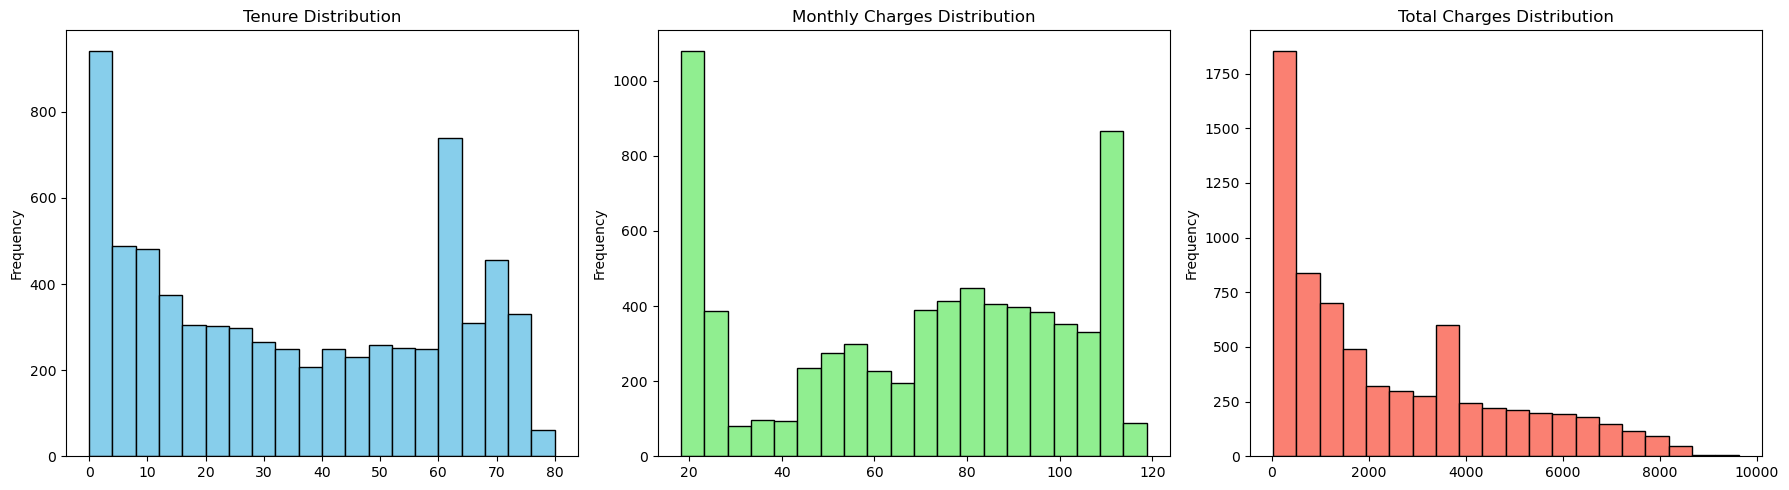

In [61]:
# Plotting histograms for 'tenure', 'MonthlyCharges', 'TotalCharges'

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

df['tenure'].plot(kind='hist', bins=20, ax=ax[0], color='skyblue', edgecolor='black')
ax[0].set_title('Tenure Distribution')

df['MonthlyCharges'].plot(kind='hist', bins=20, ax=ax[1], color='lightgreen', edgecolor='black')
ax[1].set_title('Monthly Charges Distribution')

df['TotalCharges'].plot(kind='hist', bins=20, ax=ax[2], color='salmon', edgecolor='black')
ax[2].set_title('Total Charges Distribution')

plt.tight_layout()
plt.show()


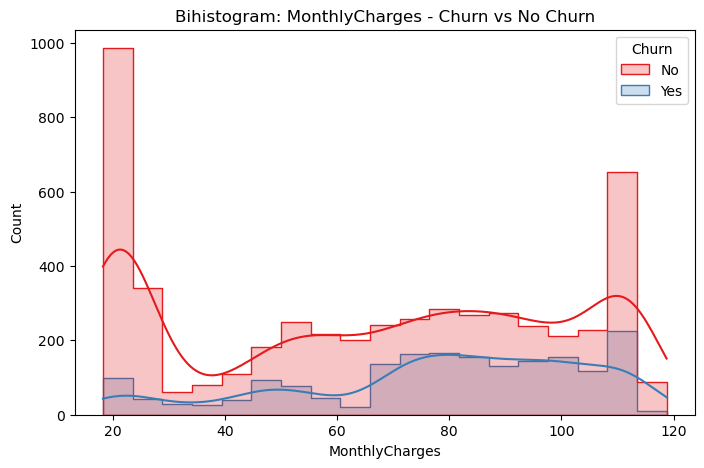

In [63]:
import seaborn as sns

# Bihistogram comparing MonthlyCharges for Churn vs. No Churn

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, element='step', palette='Set1')
plt.title('Bihistogram: MonthlyCharges - Churn vs No Churn')
plt.show()


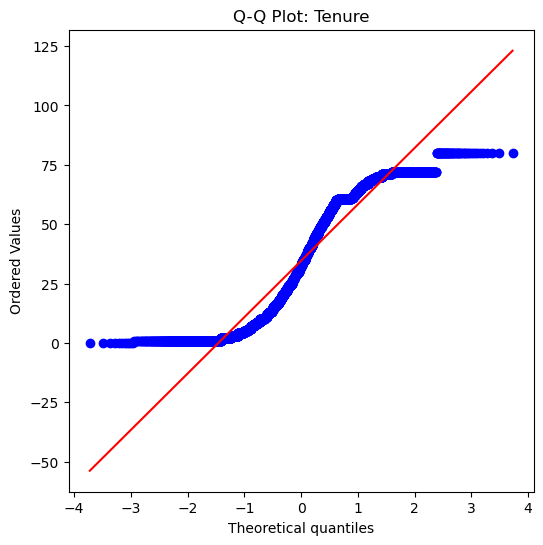

In [65]:
# Q-Q Plot for tenure

plt.figure(figsize=(6, 6))
stats.probplot(df['tenure'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Tenure')
plt.show()


/var/folders/mm/0qrx8szj5n35k4d4j7xhg76c0000gn/T/ipykernel_24997/1313059073.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, ax=ax[0], palette='coolwarm')
/var/folders/mm/0qrx8szj5n35k4d4j7xhg76c0000gn/T/ipykernel_24997/1313059073.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=ax[1], palette='coolwarm')


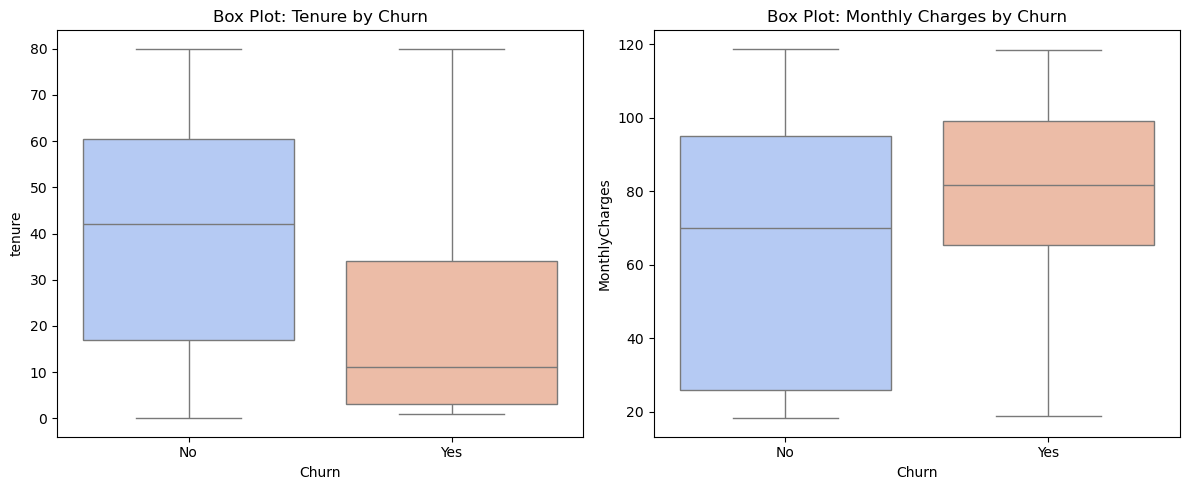

In [67]:
# Box plots to compare tenure and MonthlyCharges for churned vs non-churned customers

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x='Churn', y='tenure', data=df, ax=ax[0], palette='coolwarm')
ax[0].set_title('Box Plot: Tenure by Churn')

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=ax[1], palette='coolwarm')
ax[1].set_title('Box Plot: Monthly Charges by Churn')

plt.tight_layout()
plt.show()


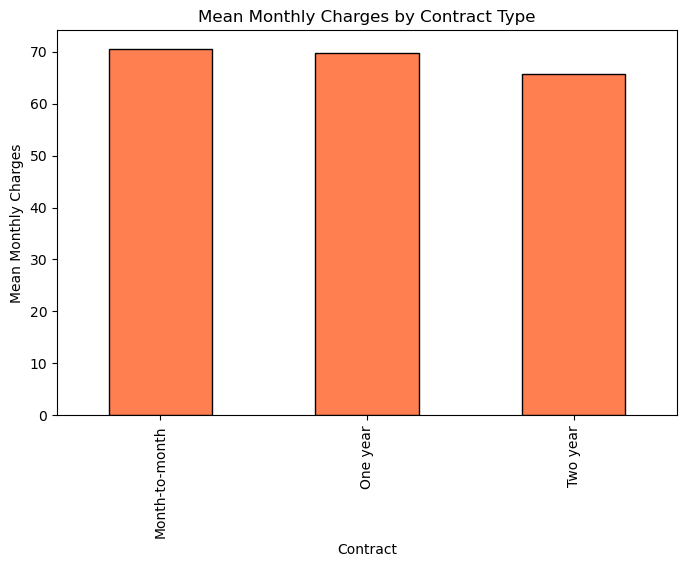

In [69]:
# Mean plot for MonthlyCharges across different Contracts

mean_charges = df.groupby('Contract')['MonthlyCharges'].mean()

plt.figure(figsize=(8, 5))
mean_charges.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Mean Monthly Charges by Contract Type')
plt.ylabel('Mean Monthly Charges')
plt.show()


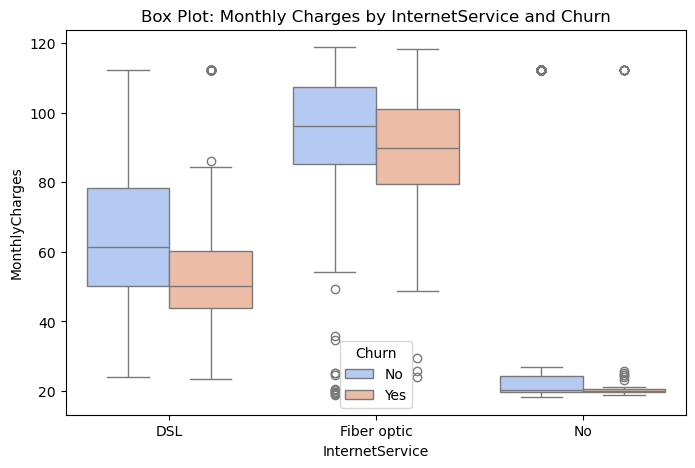

In [71]:
# Box plot to explore MonthlyCharges across different InternetService types and Churn categories

plt.figure(figsize=(8, 5))
sns.boxplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=df, palette='coolwarm')
plt.title('Box Plot: Monthly Charges by InternetService and Churn')
plt.show()


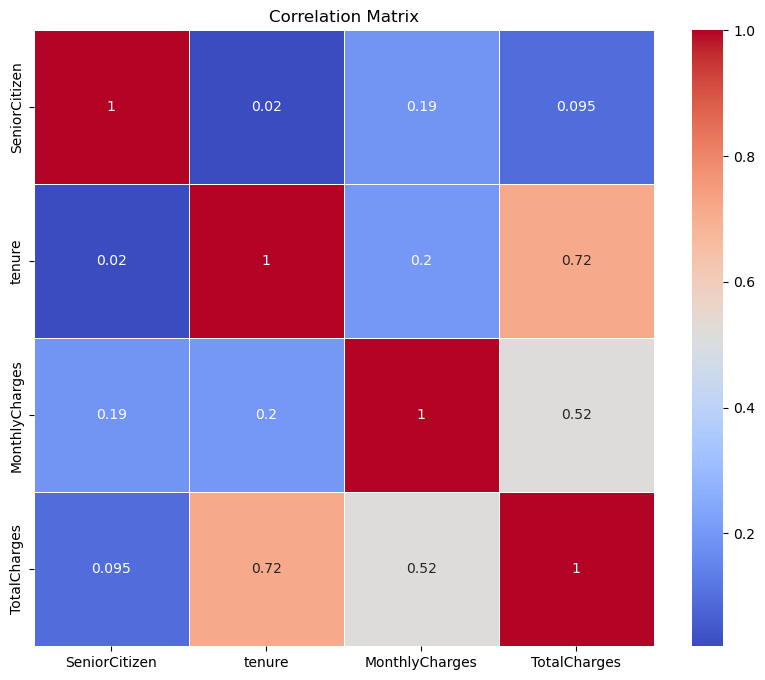

In [73]:
#Correlation matrix for the numerical datatype columns

df_number = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10, 8))
correlation_matrix = df[df_number].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()